In [1]:
# Dependencies
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import json
import tweepy
import time
import seaborn as sns

from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

In [2]:
from config import consumer_key, consumer_secret, access_token, access_token_secret

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())


In [11]:
news_outlet = ("@BBCNews", "@CBSNews", "@CNN", "@FoxNews", "@nytimes")

# List for tweet data
table_dict = []

# Loop through all targets
for outlet in news_outlet:
    counter=101
    public_tweets = api.user_timeline(outlet, count=100, result_type="recent")

    #     tweetstorage[target]= public_tweets
    for tweet in public_tweets:

        # Run Vader analysis on each tweet
        compound = analyzer.polarity_scores(tweet["text"])["compound"]
        pos = analyzer.polarity_scores(tweet["text"])["pos"]
        neu = analyzer.polarity_scores(tweet["text"])["neu"]
        neg = analyzer.polarity_scores(tweet["text"])["neg"]
        tweetorder=counter-1
        counter=counter-1
        
        #Temporarily store other values
        date=time.strftime('%m/%d/%Y', time.strptime(tweet['created_at'],'%a %b %d %H:%M:%S +0000 %Y'))
        text=(tweet["text"])
        name=(tweet["user"]["name"])

        #append stored value to DataFrame
        table_dict.append({"Media Sources":name,"Tweet Polarity":compound,"Positive":pos,"Neutral":neu,
                          "Date":date,"Text":text,"Tweets Ago":tweetorder})
        
table_dict=pd.DataFrame(table_dict)
table_dict.head()

,Date,Media Sources,Neutral,Positive,Text,Tweet Polarity,Tweets Ago
0,07/17/2018,BBC News (UK),0.656,0.000,Ruins of Cumbrian village exposed by UK drough...,-0.4939,100
1,07/17/2018,BBC News (UK),0.710,0.183,"Wednesday's Guardian: ""Relief for May as she s...",0.3182,99
2,07/17/2018,BBC News (UK),0.538,0.246,Jo Swinson says Tories broke Brexit vote agree...,0.1027,98
3,07/17/2018,BBC News (UK),0.886,0.000,"Wednesday's Times: ""Back me or we hold an elec...",-0.2023,97
4,07/17/2018,BBC News (UK),0.802,0.198,"Wednesday's Daily Telegraph: ""Four Labour MPs ...",0.4939,96


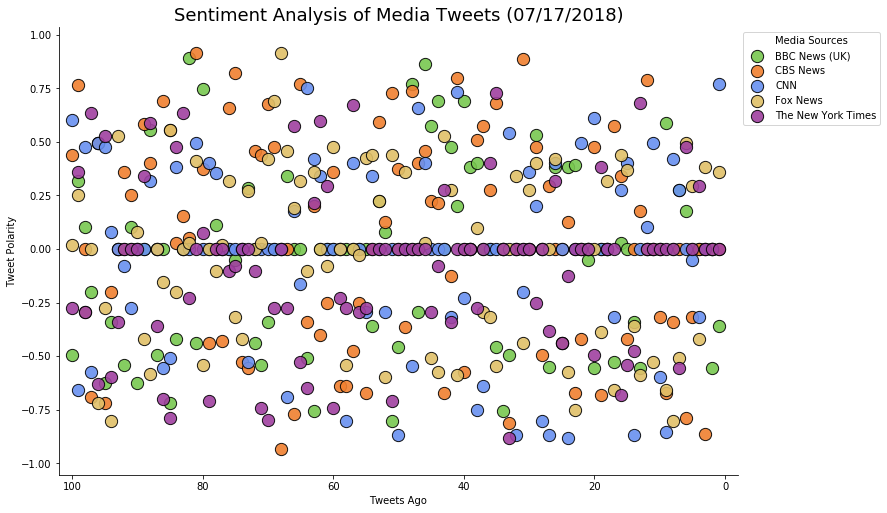

In [12]:
#create lmplot using seasborn
#set colorlist for charts
colors = ['#78C850', '#F08030', '#6890F0', '#E0C068', '#A040A0']
sns.set_palette(colors)

#create chart
MediaMood=sns.lmplot(x="Tweets Ago", y="Tweet Polarity", data= table_dict, 
           hue="Media Sources",  size=7, aspect=1.5 ,
           legend_out = True, legend = False, fit_reg=False,
           scatter_kws={"s":150,'alpha':.9,'edgecolors':"black",},ci=0)

plt.xlim(102,-2)
plt.title("Sentiment Analysis of Media Tweets ("+str(table_dict["Date"][2])+")", fontsize=18)
plt.legend(bbox_to_anchor=(1, 1), loc='upper left', ncol=1, title="Media Sources")

plt.savefig('Analysis/Output1')
plt.show(MediaMood)

In [13]:
#create dataframe for average tweet polarity per news source using groupby
news_sentiment = pd.DataFrame(table_dict.groupby(['Media Sources'])['Tweet Polarity'].mean()).reset_index()
news_sentiment

,Media Sources,Tweet Polarity
0,BBC News (UK),-0.030590
1,CBS News,0.042906
2,CNN,-0.017497
3,Fox News,-0.028762
4,The New York Times,-0.072712


C:\Users\Bates\Anaconda3\lib\site-packages\matplotlib\figure.py:418: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


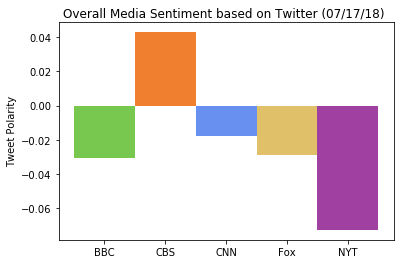

In [14]:
# Create Variable using Tuples from 'Tweet Polarity'
tweets_polarity = news_sentiment['Tweet Polarity']

# Generate bars for each news source
fig, ax = plt.subplots()
ind = np.arange(len(tweets_polarity))  
width = 1
rect1 = ax.bar(ind[0], tweets_polarity[0], width, color='#78C850')
rect2 = ax.bar(ind[1], tweets_polarity[1], width, color='#F08030')
rect3 = ax.bar(ind[2], tweets_polarity[2], width, color='#6890F0')
rect4 = ax.bar(ind[3], tweets_polarity[3], width, color='#E0C068')
rect5 = ax.bar(ind[4], tweets_polarity[4], width, color='#A040A0')

#Format Bar Graph
ax.set_ylabel("Tweet Polarity")
ax.set_title("Overall Media Sentiment based on Twitter (%s) " % (time.strftime("%x")))
ax.set_xticks(ind)
ax.set_xticklabels(("BBC", "CBS", "CNN", "Fox", "NYT"))
ax.set_autoscaley_on(True)

plt.savefig('Analysis/Output2')
fig.show()